# Ex 5: Simple and multiple linear regression analysis

## 0. Introduction

In regression analysis a relation is made between a dependent variable $Y$ (i.e. the one one wants to estimate) and one or a number of independent variables $X_i$. The objective(s) of establishing a regression model may be manifold, like:
1. Making forecasts/predictions/estimates on Y based on data of the independent variable(s)
2. Investigation of a functional relationship between two or more variables
3. Filling in missing data in the Y-series
4. Validation of Y-series

### 0.1 Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form for one independent variable:

$y = \alpha + \beta x $

 - $y$ is the response or the dependent variable
 - $x$ is the independent variable
 - $\alpha$ is the intercept
 - $\beta$ is the slope or the trend

Together, $\alpha$ and $\beta$ are called the model coefficients. To create your model, you must find the values of these coefficients.

### 0.2 Multiple Linear Regression

Multiple linear regression is an approach for predicting a quantitative response using a multiple features (or "predictors" or "input variables"). It takes the following form for the $p$ independent variables $X_i$ where $i=1,2,..,p$:

$\hat{y} = \beta_0 + \sum_{i=1}^{p}{\beta_i x_i}$

$ = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdot \cdot \cdot + \beta_px_p$

 - $\hat{y}$ is the response or the dependent variable
 - $x_i$ is the independent variable number $i$
 - $\beta_0$ is the intercept
 - $\beta_i$ is the coefficient for $x_i$
 - $p$ is the number of independent variables

Notice that for $p$=1 (one independent variable), the equation becomes the simple linear regression (where $\alpha=\beta_0$ and $\beta=\beta_1$).

### 0.3 Linear regression example
#### 0.3.1 Import libraries

In [1]:
import statsmodels.formula.api as smf  # module to run ordinary least squares analysis
from scipy import stats
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline

#### 0.3.2 Build a dataset

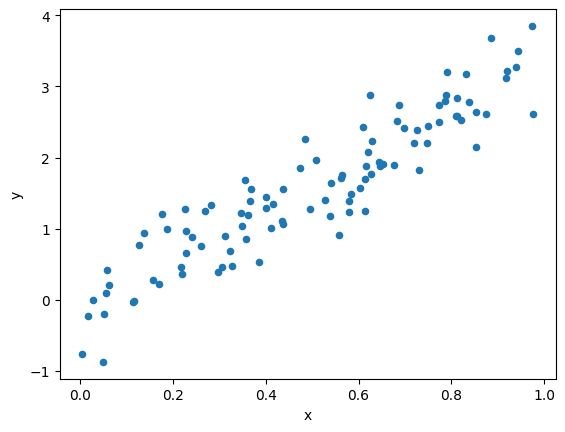

In [2]:
rng = np.random.default_rng()
x = rng.uniform(low=0, high=1, size=100) # independent variable
a, b = -0.2, 3.5
noise = rng.normal(0, 0.4, x.size) # normally distributed random noise with mean 0 and variance 0.4
df = pd.DataFrame({'x': x, 'y': a + b*x + noise})

df.plot.scatter(x='x', y='y');

#### 0.3.3 Fit a linear regression model

The estimated intercept is -0.176, while we used a = -0.20 to generate the dataset
The estimated slope is 3.507, while we used b = 3.50 to generate the dataset


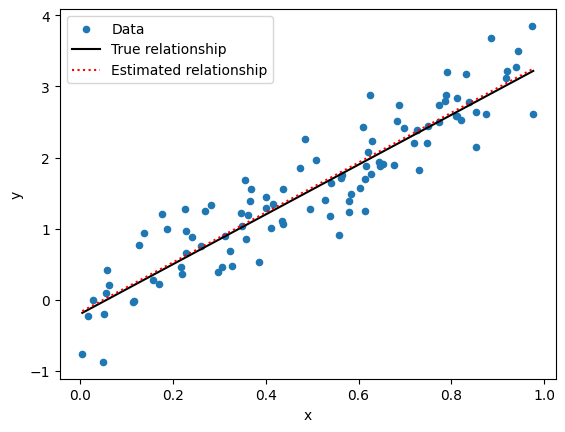

In [3]:
linfit = smf.ols(formula='y ~ x', data=df).fit()

# Estimated parameters
intercept, slope = linfit.params
print(f'The estimated intercept is {intercept:.3f}, while we used a = {a:.2f} to generate the dataset')
print(f'The estimated slope is {slope:.3f}, while we used b = {b:.2f} to generate the dataset')

# Plot data, true relationship (a,b parameters), and estimated relationship (intercept, slope paramters)
df.plot.scatter(x='x', y='y', label='Data')
plt.plot([x.min(), x.max()], [a + b*x.min(), a + b*x.max()], 'k', label='True relationship')
plt.plot([x.min(), x.max()], [intercept + slope*x.min(), intercept + slope*x.max()], 'r:', label='Estimated relationship')
plt.legend();
# You can try to change the noise above and see how it affects the differences between estimated and "true" parameters 

# How to view regression analysis results:
#print(linfit.summary()) #summary table of the regression analysis
#print(linfit.params) # Estimated parameters
#print(linfitc)
#print(linfit.bse) # Standard deviation of estimated parameters
#print(dir(linfit)) #for all possible attributes

## Question 1: Simple linear regression

Temperature data for November 1977 is available from Falun (Dalarna), Gävle (Gästrikland) and Knon (Värmland) in the file *temp_falun.dat*. For Falun the data series is not complete.

We want to fill the missing data for Falun using the best correlated data set of the three possible data sets:

1. Only the data from Gävle 
2. Only the data from Knon
3. Both Gävle and Knon and the information about distances (Gävle-Falun $ =82$ km, Knon-Falun $ =110$ km)

*Hint: inverse distance weighting method can be used to create the third dataset.*

$T_{Gavle+Knon} = \frac{\left(\frac{1}{82}\right)^2}{\left(\frac{1}{82}\right)^2 + \left(\frac{1}{110}\right)^2}T_{Gavle} + \frac{\left(\frac{1}{110}\right)^2}{\left(\frac{1}{82}\right)^2 + \left(\frac{1}{110}\right)^2}T_{Knon}$  (1)

**a)** Compute the correlation between Falun and (1), (2) and (3) and indicate which one you think is best to be used as the independent variable.

**b)** For each of the three independent variables: Fit a regression model and state the regression coefficients and how much of the variance is explained by each model, i.e. the $R^2$ values. Which model has the highest $R^2$ value? Select that model for the next part of the analysis.

*Hint: For the evaluation the coefficient of determination $R^2$ is used. It is defined as $ R^2 = \frac{\text{explained variance}}{\text{total variance}}$. You'll find this value in the upper right corner of the summary table.*

**c)** Test the significance of $\beta$, i.e. the regression paramter representing slope. State your hypotheses, degrees of freedom, test statistic value, rejection criteria and conclusion.

*Hint: You can use a two-sided t-test to test if the slope is significantly different from zero. When calculating the test statisic, the standard error (used in the denominator) is the 'std err' given in the summary table of the regression analysis.
You can also get the standard errors of the parameters as `linfit.bse`, where `linfit` is the output of `smf.ols(...).fit()` (see example above).*

**d)** In the same figure, plot the time series of the observed data at the three stations together with the estimated temperature at Falun using the best model.

## Question 2: Multiple linear regression

In a **standard multiple linear regression**, all the independent variables are used in the regression model. Disadvantages of including all independent variables may include high cost of collecting all the data, including variables that do not improve the fit, and overfitting (making the model worse in predicting new data points).

That is why we introduce **forward selection** (or similar procedures). By this method, we can start by performing a simple regression using the independent variable which has the highest correlation with the dependent variable. Then, add another independent variable, and make sure that this second independent variable should have the highest partial correlation with the dependent while the influence of the first independent variable is removed. Continue this procedure to see if the addition of a third independent variable will be helpful. 

**a)** In the file *multidata.txt* there are a number of numerical variables. Choose Y as the dependent variable and X1, X2, X3 as the independent variables. Perform a multiple linear regression using forward selection method (called "stepwise multiple regression" in the compendium, p 107). State in each step the choices you make, the reasons behind them, and the values you calculate (which the choices are based on).

**b)** Present in each case (for the model you make in each step) the $R^2$ and $R^2_{adj}$ values and the regression equations.
$$ R_{adj} = 1 - \left(1 - R^2\right) \dfrac{n - 1}{n - k - 1}$$
where $n$ is the number of data points, and $k$ the number of independent variables used in the regression (compendium p 106).

**c)** Present also your F-test results (use $\alpha$ = 5%)

**d)** What are your conclusions, and why? Which model do you choose?